In [52]:
import pandas as pd
import sqlite3
import openpyxl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("../Sample-Superstore.csv", sep = ",", encoding='windows-1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [5]:
df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('-','')

In [6]:
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [10]:
df_monetary = df.groupby('CustomerID')['Sales'].sum()
df_monetary = df_monetary.reset_index()

In [11]:
df_monetary.head()

,CustomerID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [15]:
df_freuquency = df.groupby('CustomerID')["OrderID"].count()
df_freuquency = df_freuquency.reset_index()
df_freuquency

,CustomerID,OrderID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [19]:
df_Recency = df.groupby("CustomerID")["OrderDate"].max()
df_Recency = df_Recency.reset_index()
df_Recency

,CustomerID,OrderDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2016-11-10
...,...,...
788,XP-21865,2017-11-17
789,YC-21895,2017-12-26
790,YS-21880,2017-12-21
791,ZC-21910,2017-11-06


In [23]:
df1 = pd.merge(pd.merge(df_monetary, df_freuquency, on = "CustomerID"), df_Recency, on = "CustomerID")
df1

,CustomerID,Sales,OrderID,OrderDate
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21
791,ZC-21910,8025.707,31,2017-11-06


In [46]:
df1.rename(columns = {'Sales':'Amount', 'OrderID':'Frequency', 'OrderDate':'Recency'}, inplace = True)
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_23040\2461471150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Sales':'Amount', 'OrderID':'Frequency', 'OrderDate':'Recency'}, inplace = True)


,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
785,VT-21700,1736.596,9,2015-04-05
786,VW-21775,6134.038,18,2017-12-02
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21


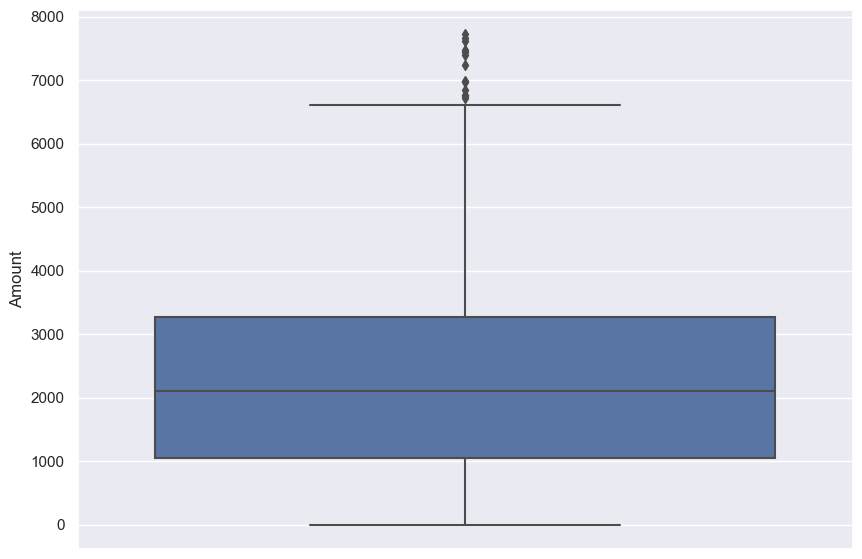

In [45]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Amount")
plt.show()

remove outliers

In [33]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [47]:
df1 = remove_outlier(df1, "Amount")

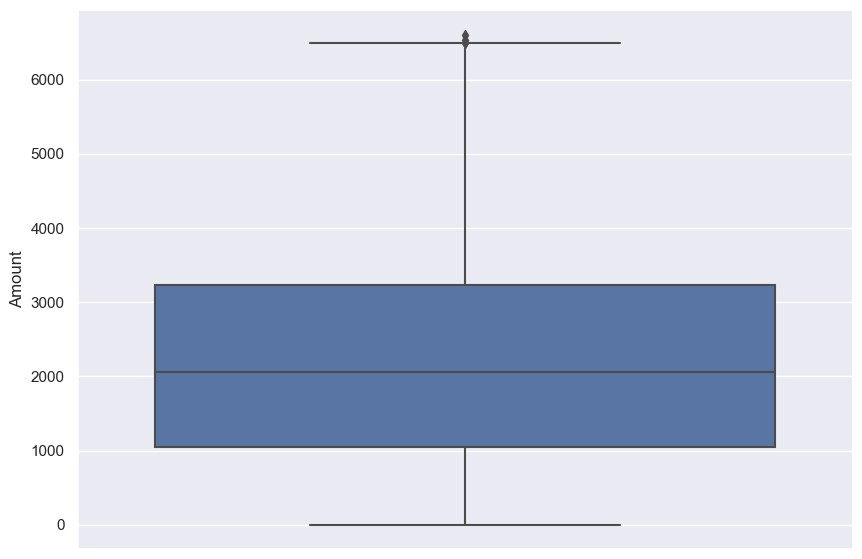

In [48]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Amount")
plt.show()

In [49]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
784,VS-21820,1055.981,8,2017-05-23
785,VT-21700,1736.596,9,2015-04-05
786,VW-21775,6134.038,18,2017-12-02
789,YC-21895,5454.350,8,2017-12-26


In [50]:
df1 = remove_outlier(df1, "Frequency")

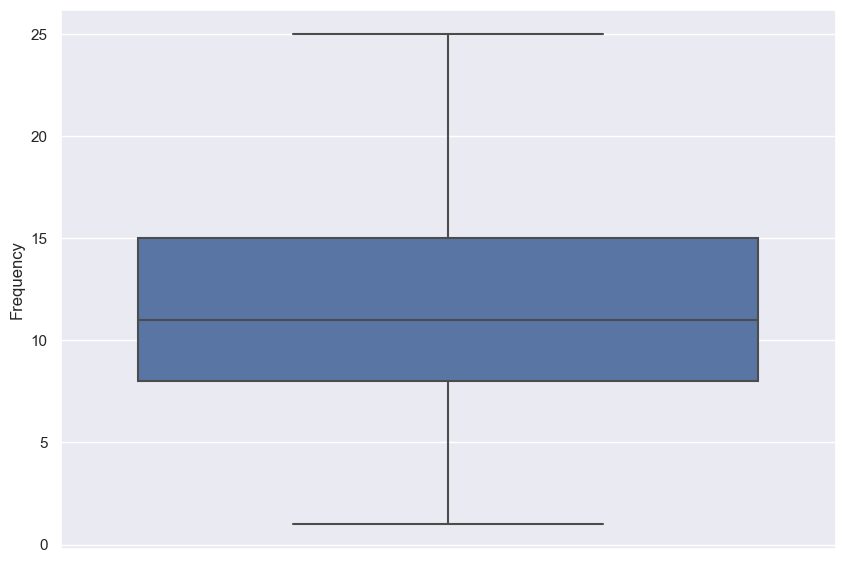

In [51]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Frequency")
plt.show()

In [53]:
# Rescaling the attributes
df2 = df1[["Amount", "Frequency", "Recency"]]

# Instantiate
scaler = StandardScaler()

# fit_transform
df2_scaled = scaler.fit_transform(df2)
df2_scaled.shape

df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = ['Amount', 'Frequency', 'Recency']
df2_scaled.head()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>)